In [1]:


# Import of keras model and hidden layers for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk(r'C:\Users\mayan\Desktop\pothole-detection-dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [2]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('C:\\Users\\mayan\\Desktop\\pothole-detection-dataset\\normal\\')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

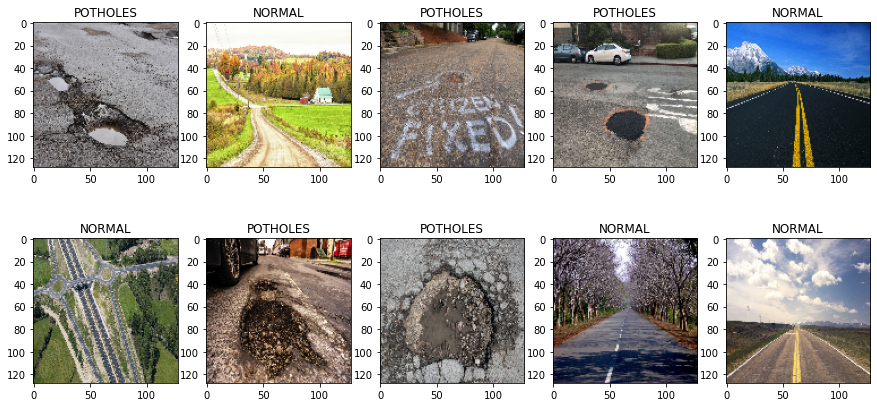

In [3]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [5]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [6]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [8]:
model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Epoch 1/30
43/43 - 7s - loss: 2.7349 - accuracy: 0.5196 - val_loss: 0.6437 - val_accuracy: 0.7000
Epoch 2/30
43/43 - 6s - loss: 0.5936 - accuracy: 0.6863 - val_loss: 0.6030 - val_accuracy: 0.6412
Epoch 3/30
43/43 - 6s - loss: 0.5909 - accuracy: 0.7078 - val_loss: 0.7618 - val_accuracy: 0.6059
Epoch 4/30
43/43 - 6s - loss: 0.5163 - accuracy: 0.7275 - val_loss: 0.5452 - val_accuracy: 0.7176
Epoch 5/30
43/43 - 7s - loss: 0.4705 - accuracy: 0.7863 - val_loss: 0.4742 - val_accuracy: 0.7706
Epoch 6/30
43/43 - 7s - loss: 0.4515 - accuracy: 0.8176 - val_loss: 0.5947 - val_accuracy: 0.6765
Epoch 7/30
43/43 - 7s - loss: 0.4675 - accuracy: 0.7804 - val_loss: 0.6562 - val_accuracy: 0.6706
Epoch 8/30
43/43 - 7s - loss: 0.4411 - accuracy: 0.7941 - val_loss: 0.4137 - val_accuracy: 0.8353
Epoch 9/30
43/43 - 7s - loss: 0.3195 - accuracy: 0.8784 - val_loss: 0.4545 - val_accuracy: 0.7765
Epoch 10/30
43/43 - 7s - loss: 0.3852 - accuracy: 0.8255 - val_loss: 0.3942 - val_accuracy: 0.7941
Epoch 11/30
43/43 -

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6/6 [==============================] - 0s 69ms/step - loss: 0.3207 - accuracy: 0.8882
Test accuracy: 88.82%


In [10]:
# Making predictions on test data
prediction = model.predict(x_test)
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    
        
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred),columns=["Predicted NORMAL", "Predicted POTHOLES"],index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,66,16
Actual POTHOLES,3,85


Epoch 1/3
51/51 - 8s - loss: 13.0461 - accuracy: 0.7092 - val_loss: 0.5513 - val_accuracy: 0.7794
Epoch 2/3
51/51 - 8s - loss: 0.4014 - accuracy: 0.8284 - val_loss: 0.3771 - val_accuracy: 0.8824
Epoch 3/3
51/51 - 9s - loss: 0.2947 - accuracy: 0.8922 - val_loss: 0.3484 - val_accuracy: 0.8971
3/3 [==============================] - 0s 43ms/step - loss: 0.6644 - accuracy: 0.8971
Epoch 1/3
46/46 - 8s - loss: 8.8177 - accuracy: 0.6783 - val_loss: 0.4769 - val_accuracy: 0.7941
Epoch 2/3
46/46 - 8s - loss: 0.5644 - accuracy: 0.7868 - val_loss: 0.4036 - val_accuracy: 0.8824
Epoch 3/3
46/46 - 8s - loss: 0.3725 - accuracy: 0.8438 - val_loss: 0.6599 - val_accuracy: 0.6838
5/5 [==============================] - 0s 73ms/step - loss: 0.7228 - accuracy: 0.6838
Epoch 1/3
40/40 - 8s - loss: 20.5907 - accuracy: 0.6303 - val_loss: 0.5484 - val_accuracy: 0.7647
Epoch 2/3
40/40 - 7s - loss: 0.3781 - accuracy: 0.8193 - val_loss: 0.2306 - val_accuracy: 0.9314
Epoch 3/3
40/40 - 7s - loss: 0.2835 - accuracy: 0.

Text(0, 0.5, 'accuracy')

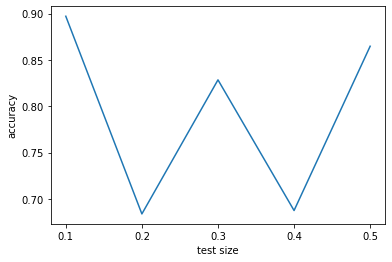

In [11]:
r2=[]
k=[0.1,0.2,0.3,0.4,0.5]

for i in k:
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i,random_state=5)
    model = Sequential()

    model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=3, batch_size=12, verbose=2, 
             validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    r2.append(accuracy)
    
plt.plot(k,r2)
plt.xticks(k)
plt.xlabel("test size")
plt.ylabel("accuracy")

Epoch 1/3
29/29 - 5s - loss: 0.3185 - accuracy: 0.8706 - val_loss: 0.5828 - val_accuracy: 0.7176
Epoch 2/3
29/29 - 5s - loss: 0.2673 - accuracy: 0.8912 - val_loss: 0.3914 - val_accuracy: 0.8500
Epoch 3/3
29/29 - 5s - loss: 0.2979 - accuracy: 0.8676 - val_loss: 0.4619 - val_accuracy: 0.7794


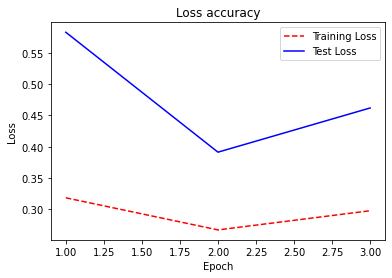

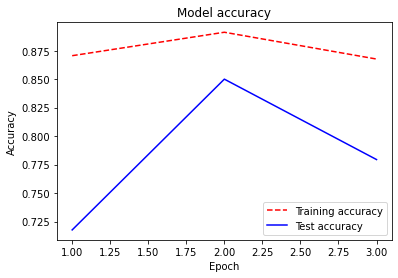

In [12]:
history =  model.fit(x_train, y_train, epochs=3, batch_size=12, verbose=2, 
             validation_data=(x_test, y_test))

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss accuracy')
plt.show()

training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_count = range(1, len(training_acc) + 1)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()